In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

In [8]:
#reading in original dataframe of seasonal statistics
players = pd.read_csv('Data/NBA_player_seasonal.csv', index_col = 'Rk')
players.head()

,Player,Season,Age,Tm,Lg,WS,G,GS,MP,FG,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
Rk,,,,,,,,,,,,,,,,,,,,,
1,Kareem Abdul-Jabbar\abdulka01,1971-72,24.0,MIL,NBA,25.4,81,NaN,3583.0,1159,...,NaN,NaN,235,2822,0.574,0.574,NaN,0.574,0.689,0.603
2,Wilt Chamberlain\chambwi01,1963-64,27.0,SFW,NBA,25.0,80,NaN,3689.0,1204,...,NaN,NaN,182,2948,0.524,0.524,NaN,0.524,0.531,0.537
3,George Mikan\mikange01,1950-51,26.0,MNL,NBA,23.4,68,NaN,NaN,678,...,NaN,NaN,308,1932,0.428,0.428,NaN,0.428,0.803,0.509
4,Wilt Chamberlain\chambwi01,1961-62,25.0,PHW,NBA,23.1,80,NaN,3882.0,1597,...,NaN,NaN,123,4029,0.506,0.506,NaN,0.506,0.613,0.536
5,Kareem Abdul-Jabbar\abdulka01,1970-71,23.0,MIL,NBA,22.3,82,NaN,3288.0,1063,...,NaN,NaN,264,2596,0.577,0.577,NaN,0.577,0.690,0.606


In [15]:
#sorting dataframe by players and seasons
players.sort_values(by=['Player', 'Season'], inplace = True)

In [26]:
#creating a column that incrementally counts seasons players have played in
players['season_count'] = players.groupby('Player').cumcount()+1

In [32]:
#creating per game statistics
players['ppg'] = players['PTS']/players['G']
players['apg'] = players['AST']/players['G']
players['rpg'] = players['TRB']/players['G']
players['spg'] = players['STL']/players['G']
players['bpg'] = players['BLK']/players['G']
players['tpg'] = players['TOV']/players['G']
players['ftpg'] = players['FT']/players['G']

In [75]:
#splitting player names into name and unique ID
players['name_split'] = players['Player'].str.split('\\')
players['name'] = [x[0] for x in players['name_split']]
players['unique_id'] = [x[1] for x in players['name_split']]
#splitting year to seperate year awards are given
players['year_split'] = players['Season'].str.split('-')
players['award_year'] = [x[1] for x in players['year_split']]

In [104]:
#reading in all nba first team data
all_nba1 = pd.read_csv('Data/All_NBA_1.csv')
#creating shortened award year
all_nba1['award_year'] = [str(x)[2:] for x in all_nba1['YEAR']]
all_nba1.head()

,YEAR,PLAYER,POS,TEAM,FG%,PPG,RPG,APG,BLKPG,award_year
0,2020,LeBron James,F,Los Angeles Lakers,0.493,25.3,7.8,10.2,0.5,20
1,2020,James Harden,G,Houston Rockets,0.444,34.3,6.6,7.5,0.9,20
2,2020,Anthony Davis,F,Los Angeles Lakers,0.503,26.1,9.3,3.2,2.3,20
3,2020,Giannis Antetokounmpo,F,Milwaukee Bucks,0.553,29.5,13.6,5.6,1.0,20
4,2020,Luka Doncic,G,Dallas Mavericks,0.463,28.8,9.4,8.8,0.2,20


In [87]:
all_nba1['award_year'] = [str(x)[2:] for x in all_nba1['YEAR']]

In [101]:
players.where(players['name']==all_nba1['PLAYER'], True, False)

ValueError: Can only compare identically-labeled Series objects

In [88]:
players['all_nba_1'] = (players['name'].isin(all_nba1['PLAYER'])) & (players['award_year'].isin(all_nba1['award_year']))

In [91]:
players['all_nba_1'].value_counts()

False    21664
True      1209
Name: all_nba_1, dtype: int64

In [103]:
all_nba1.head()

,YEAR,PLAYER,POS,TEAM,FG%,PPG,RPG,APG,BLKPG,award_year
0,2020,LeBron James,F,Los Angeles Lakers,0.493,25.3,7.8,10.2,0.5,20
1,2020,James Harden,G,Houston Rockets,0.444,34.3,6.6,7.5,0.9,20
2,2020,Anthony Davis,F,Los Angeles Lakers,0.503,26.1,9.3,3.2,2.3,20
3,2020,Giannis Antetokounmpo,F,Milwaukee Bucks,0.553,29.5,13.6,5.6,1.0,20
4,2020,Luka Doncic,G,Dallas Mavericks,0.463,28.8,9.4,8.8,0.2,20


In [30]:
#creating dataframe of only first 3 years
players_first3 = players[players['season_count'] < 4]


<AxesSubplot:xlabel='season_count', ylabel='ppg'>

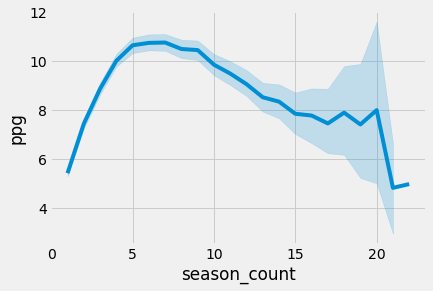

In [45]:
#lineplot showing ppg avg by year in NBA
sns.lineplot(x = players['season_count'], y = players['ppg'])

<AxesSubplot:xlabel='season_count', ylabel='WS'>

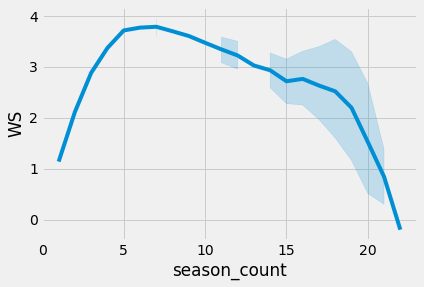

In [46]:
# lineplot showing avg win-share by year in NBA
sns.lineplot(x = players['season_count'], y = players['WS'])